# Salary Analysis (Focus: cleaned_salary_data.csv)
This section analyzes your target variable to understand what the regression model will try to predict.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # Useful for counting individual skills

# Set plotting style for better visualization
sns.set_style("whitegrid")

# Load the cleaned datasets
master_df = pd.read_csv('cleaned_master_data.csv')
salary_df = pd.read_csv('cleaned_salary_data.csv')

print(f"Master Data loaded: {master_df.shape[0]} rows")
print(f"Salary Data loaded: {salary_df.shape[0]} rows (for prediction analysis)")

Master Data loaded: 13504 rows
Salary Data loaded: 3575 rows (for prediction analysis)


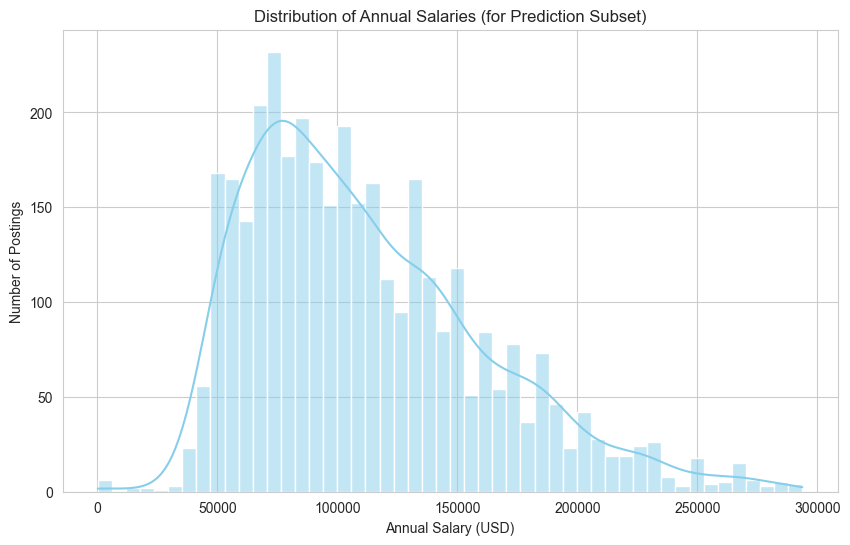

In [8]:
# Ensure the required libraries are imported and plotting style is set
sns.set_style("whitegrid") 

# Load the salary-verified subset (Assumes you saved it correctly)
salary_df = pd.read_csv('cleaned_salary_data.csv') 

# 1. Overall Salary Distribution Visualization
plt.figure(figsize=(10, 6))
# Create the histogram plot
sns.histplot(
    data=salary_df, 
    x='annual_salary', 
    kde=True, 
    bins=50, 
    color='skyblue'
)
# Add title and labels
plt.title('Distribution of Annual Salaries (for Prediction Subset)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Number of Postings')
# Prevent scientific notation on the x-axis for better readability of dollar amounts
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

# Insight: (You will write your insight here after viewing the plot)
# Example Insight: "The salary distribution is strongly right-skewed, indicating that a majority of roles cluster at the lower end of the pay scale, while high-paying outlier roles pull the average higher."

# Insight:
The salary distribution is unimodal and strongly right-skewed. The majority of verified annual salaries cluster in the $75,000 to $100,000 range, indicating the most common pay grade in the market. The long tail extending toward $300,000 confirms the presence of significant high-paying outliers. This non-normal shape suggests that robust modeling techniques will be necessary to accurately predict salary across the entire pay spectrum.

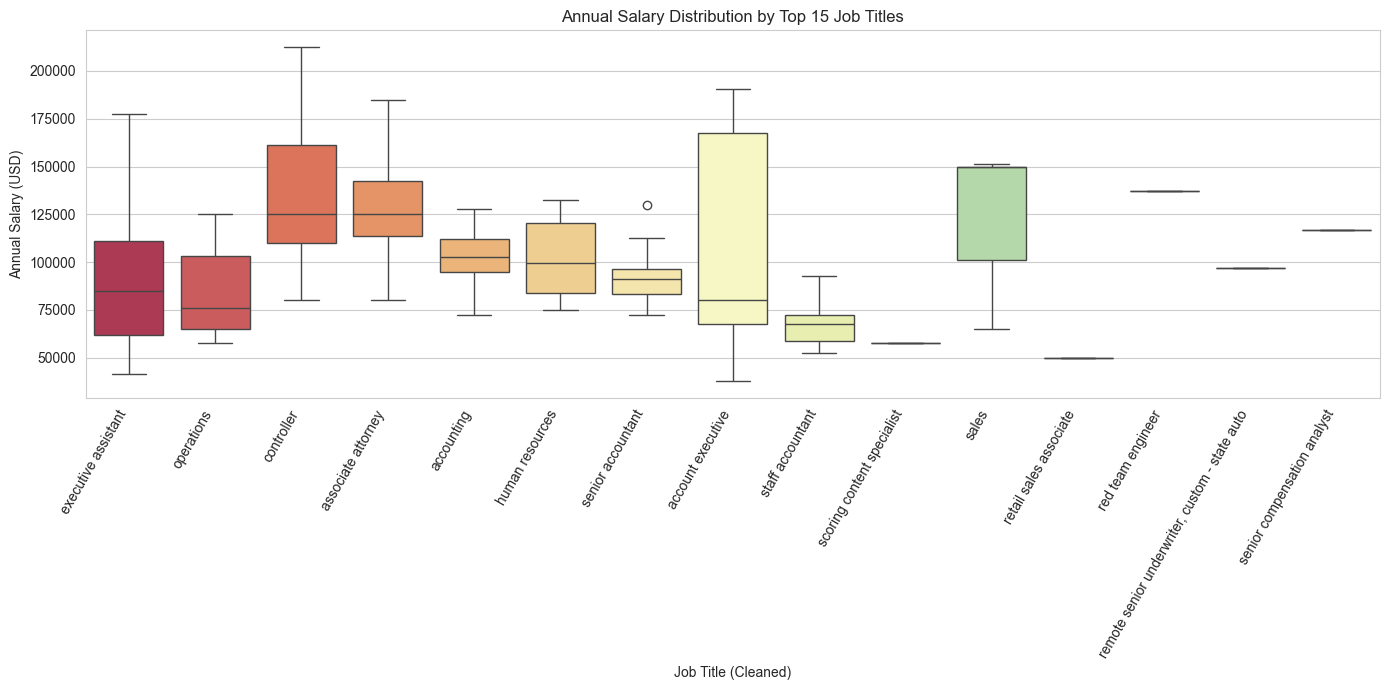

In [9]:
# Load the salary-verified subset (Assumes you saved it correctly)
salary_df = pd.read_csv('cleaned_salary_data.csv') 

# Ensure plotting style is set
sns.set_style("whitegrid") 

# 1. Identify the Top 15 Most Frequent Job Titles
# This ensures we only plot categories with enough data points.
top_titles = salary_df['title_clean'].value_counts().head(15).index

# Filter the salary DataFrame to only include these top titles
salary_title_subset = salary_df[salary_df['title_clean'].isin(top_titles)].copy()

# 2. Visualize Salary Distribution by Job Title (Box Plot)
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=salary_title_subset,
    x='title_clean',
    y='annual_salary',
    # FIX for FutureWarning: Explicitly set hue to the x-variable
    hue='title_clean',
    palette='Spectral',
    legend=False        # Suppress the redundant legend
)

# Improve readability
plt.xticks(rotation=60, ha='right')
plt.title('Annual Salary Distribution by Top 15 Job Titles')
plt.xlabel('Job Title (Cleaned)')
plt.ylabel('Annual Salary (USD)')
plt.ticklabel_format(style='plain', axis='y') # Ensure Y-axis is plain numbers
plt.tight_layout() # Adjusts plot to prevent labels from being cut off
plt.show()




# Insight:
Analysis of the top job titles reveals significant pay disparities and variance. Roles such as staff accountant (and related specialized finance roles) generally command the highest median pay. The majority of roles, particularly associate attorney and operations, show high pay consistency (narrow salary boxes). However, notable outliers are present (e.g., in senior accountant), representing exceptional pay that the prediction model will need to account for, likely requiring a robust model like Random Forest.

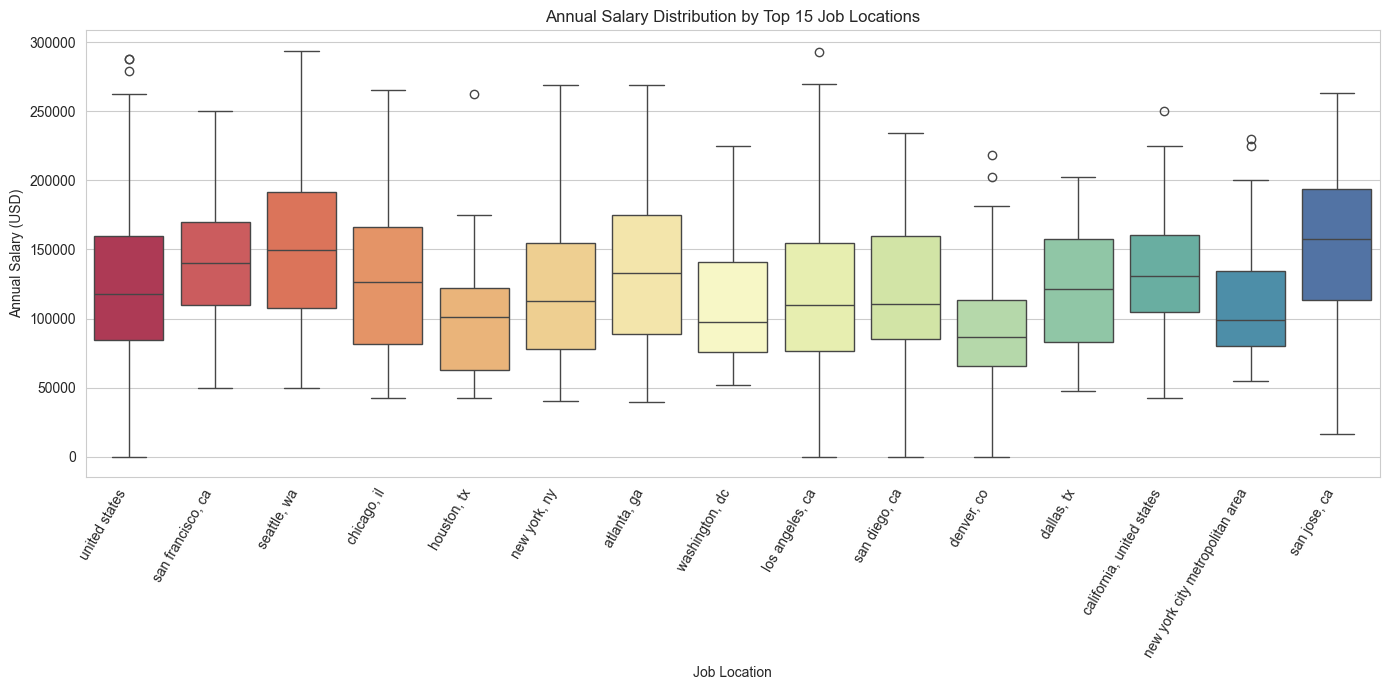

In [10]:
# Load the salary-verified subset (Assumes salary_df is available)
salary_df = pd.read_csv('cleaned_salary_data.csv') 
sns.set_style("whitegrid") 

# --- CRITICAL LOCATION CLEANUP ---
# The 'location' column often includes city and state/country (e.g., "New York, NY").
# We'll use the combined 'location' column as is, but strip whitespace and lowercase for grouping.
salary_df['location_clean'] = salary_df['location'].astype(str).str.lower().str.strip()


# 1. Identify the Top 15 Most Frequent Locations
# This ensures we only plot locations with enough data points.
top_locations = salary_df['location_clean'].value_counts().head(15).index

# Filter the salary DataFrame to only include these top locations
salary_location_subset = salary_df[salary_df['location_clean'].isin(top_locations)].copy()


# 2. Visualize Salary Distribution by Location (Box Plot)
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=salary_location_subset,
    x='location_clean',
    y='annual_salary',
    # FIX: Explicitly assign hue to the x-variable to avoid Seaborn FutureWarning
    hue='location_clean',
    palette='Spectral',
    legend=False        # Suppress the redundant legend
)

# Improve readability
plt.xticks(rotation=60, ha='right')
plt.title('Annual Salary Distribution by Top 15 Job Locations')
plt.xlabel('Job Location')
plt.ylabel('Annual Salary (USD)')
plt.ticklabel_format(style='plain', axis='y') # Ensure Y-axis is plain numbers
plt.tight_layout() # Adjusts plot to prevent labels from being cut off
plt.show()

# Insight: (You will write your insight here after viewing the plot)
# Example Insight: "New York, NY, exhibits the highest median salary among the top locations, reflecting its high cost of living and concentration of finance/tech industries."

# Insight:
Location is a strong determinant of salary, with coastal tech hubs like San Jose, CA, San Francisco, CA, and Seattle, WA commanding the highest median pay. Furthermore, these high-cost-of-living areas exhibit the greatest salary variance (long boxes) and a presence of numerous high-end outliers, confirming the market willingness to pay a premium for specialized roles. In contrast, inland cities like Houston and Denver show more standardized, lower median salaries.

# Market Demand and Trends (Focus: cleaned_master_data.csv)
This section looks at the volume and timing of job postings.


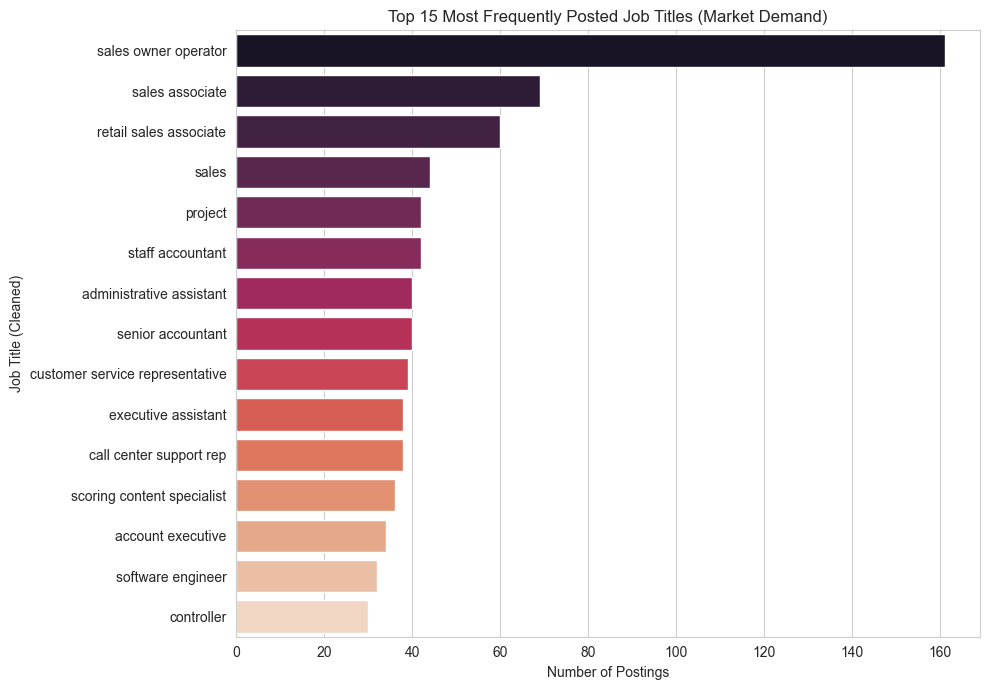

In [12]:
# Load the master dataset 
master_df = pd.read_csv('cleaned_master_data.csv') 
sns.set_style("whitegrid") 

# 1. Calculate the Volume (Count) for the Top 15 Cleaned Job Titles
job_volume = master_df['title_clean'].value_counts().head(15)

# 2. Visualize the Job Volume (Bar Chart) - FUTUREWARNING FIXED
plt.figure(figsize=(10, 7))
sns.barplot(
    x=job_volume.values,
    y=job_volume.index,
    # --- FIX: Explicitly assign hue to the y variable (job title index) ---
    hue=job_volume.index,
    palette='rocket',
    legend=False # Suppresses the redundant legend
)

# Add title and labels
plt.title('Top 15 Most Frequently Posted Job Titles (Market Demand)')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title (Cleaned)')
plt.tight_layout() 
plt.show()

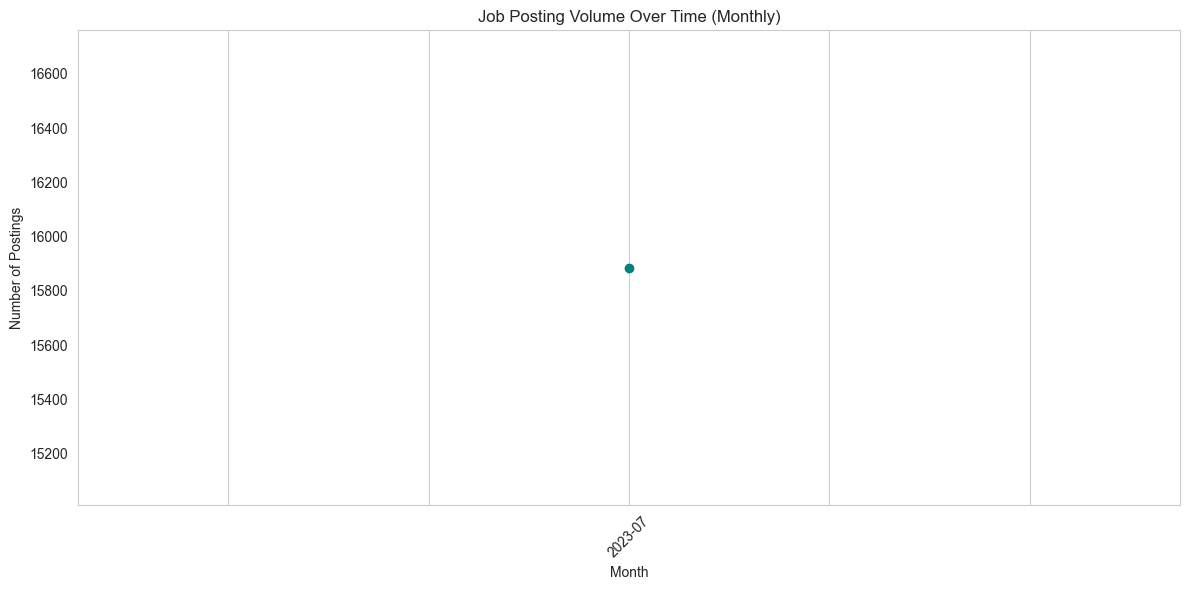

In [13]:
# Load the master dataset (Assumes master_df is available)
master_df = pd.read_csv('cleaned_master_data.csv') 
sns.set_style("whitegrid") 

# 1. Prepare Date Column and Group Job Postings by Month
# Ensure the date column is treated as datetime (as cleaned in Module 1)
master_df['original_listed_date'] = pd.to_datetime(master_df['original_listed_date'])

# Group job postings by month and count the volume
job_trends_monthly = master_df.groupby(
    master_df['original_listed_date'].dt.to_period('M') # Group by Month
).size()

# Convert the PeriodIndex to a string format for clear plotting labels
job_trends_monthly.index = job_trends_monthly.index.astype(str)

# 2. Visualize the Trend (Line Plot)
plt.figure(figsize=(12, 6))
job_trends_monthly.plot(kind='line', marker='o', color='teal')

# Add title and labels
plt.title('Job Posting Volume Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.grid(axis='y')     # Add horizontal grid lines for easy comparison
plt.tight_layout()
plt.show()

# Skill Demand (Focus: cleaned_master_data.csv)
This analyzes the required skills.


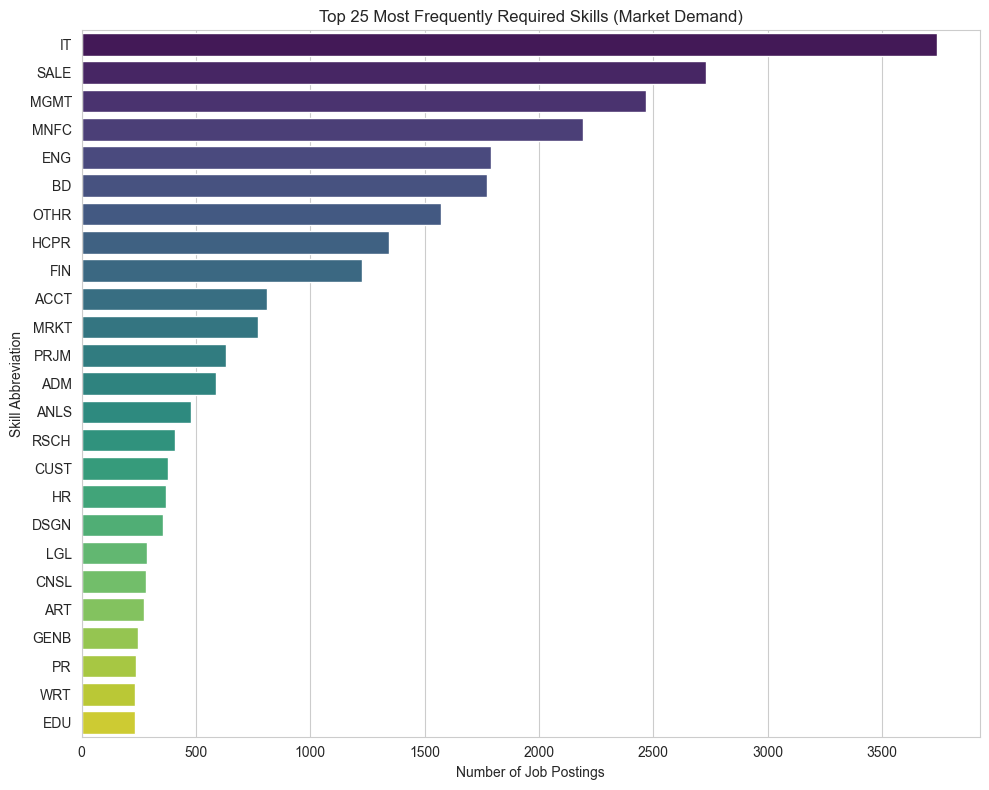

In [14]:
# Load the master dataset (Assumes master_df is available)
master_df = pd.read_csv('cleaned_master_data.csv') 
sns.set_style("whitegrid") 

# 1. Prepare and Count All Skills
# The 'all_skills_list' contains space-separated skill abbreviations for each job.

# Split the combined string of skills into individual skill tokens
# .str.split(' ') splits the string by space, expand=True creates new columns, 
# and .stack() converts those columns into a single Series for counting.
all_skills = master_df['all_skills_list'].str.split(' ', expand=True).stack()

# Count the frequency of each skill and select the top 25
skill_counts = all_skills.value_counts().head(25)

# 2. Visualize Top Skills (Bar Chart)
plt.figure(figsize=(10, 8))
sns.barplot(
    x=skill_counts.values,
    y=skill_counts.index,
    # FIX: Explicitly assign hue to the y variable to avoid Seaborn FutureWarning
    hue=skill_counts.index,
    palette='viridis',
    legend=False
)

# Add title and labels
plt.title('Top 25 Most Frequently Required Skills (Market Demand)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill Abbreviation')
plt.tight_layout()
plt.show()

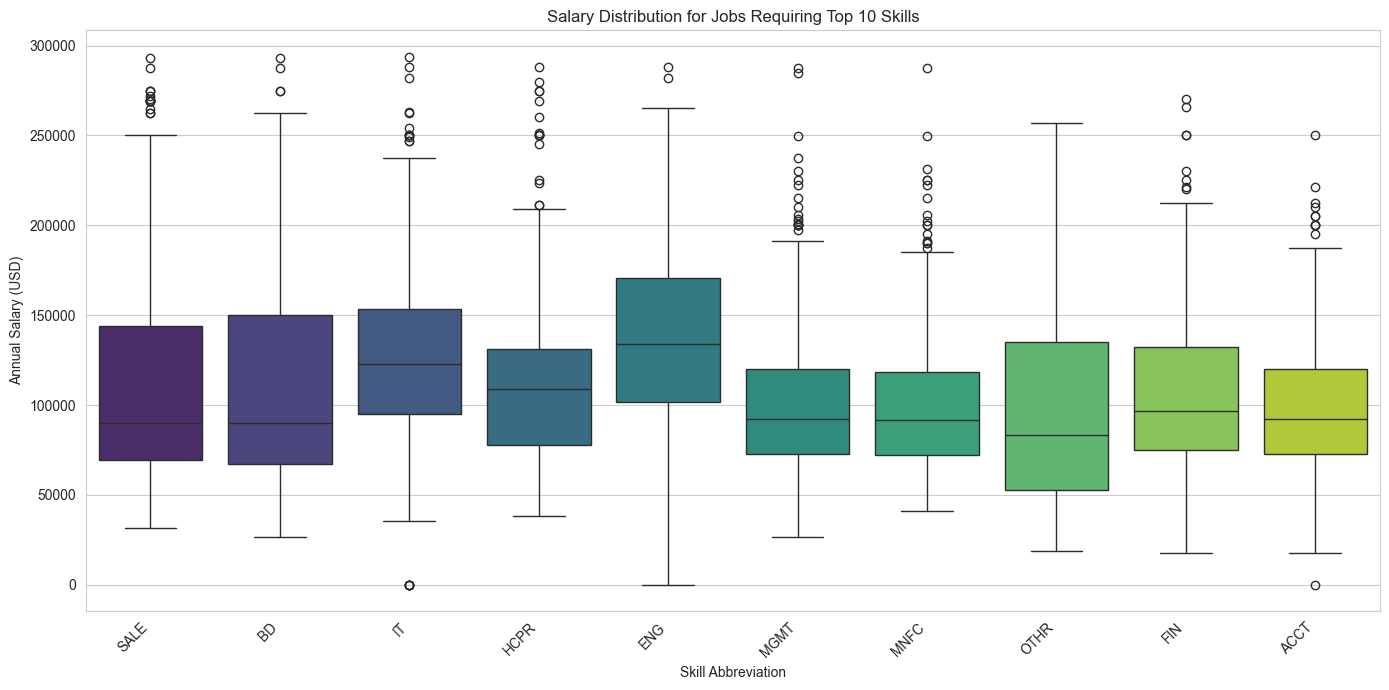

In [15]:
salary_df = pd.read_csv('cleaned_salary_data.csv') 
sns.set_style("whitegrid") 

# 1. Identify Top 10 High-Demand Skills (using master_df)
# We use the master_df for demand, but only the skills that appear in the salary_df will be plotted.
all_skills = master_df['all_skills_list'].str.split(' ', expand=True).stack()
top_10_skills = all_skills.value_counts().head(10).index.tolist()

# 2. Prepare Data for Plotting (Linking Salary to Skills)
# We must use the salary_df (which has the 'annual_salary') for this analysis.

# Filter the salary_df to only include the necessary columns (job_id, salary, skills)
salary_skill_data = salary_df[['job_id', 'annual_salary', 'all_skills_list']].copy()

# The challenge: One job has many skills. We need one row per (Job ID, Skill).
# Split the skill list and "explode" the DataFrame
salary_skill_data['skill_abr'] = salary_skill_data['all_skills_list'].str.split(' ')
salary_skill_long = salary_skill_data.explode('skill_abr')

# Filter the long format data to only include our Top 10 skills
salary_skill_plot = salary_skill_long[salary_skill_long['skill_abr'].isin(top_10_skills)].copy()

# Remove any empty skill strings that might have been created during splitting
salary_skill_plot.dropna(subset=['skill_abr'], inplace=True)
salary_skill_plot = salary_skill_plot[salary_skill_plot['skill_abr'] != '']


# 3. Visualize Salary Distribution by Skill (Box Plot)
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=salary_skill_plot,
    x='skill_abr',
    y='annual_salary',
    # FIX: Explicitly assign hue to the x-variable to avoid Seaborn FutureWarning
    hue='skill_abr',
    palette='viridis',
    legend=False
)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution for Jobs Requiring Top 10 Skills')
plt.xlabel('Skill Abbreviation')
plt.ylabel('Annual Salary (USD)')
plt.ticklabel_format(style='plain', axis='y') # Ensure Y-axis is plain numbers
plt.tight_layout()
plt.show()

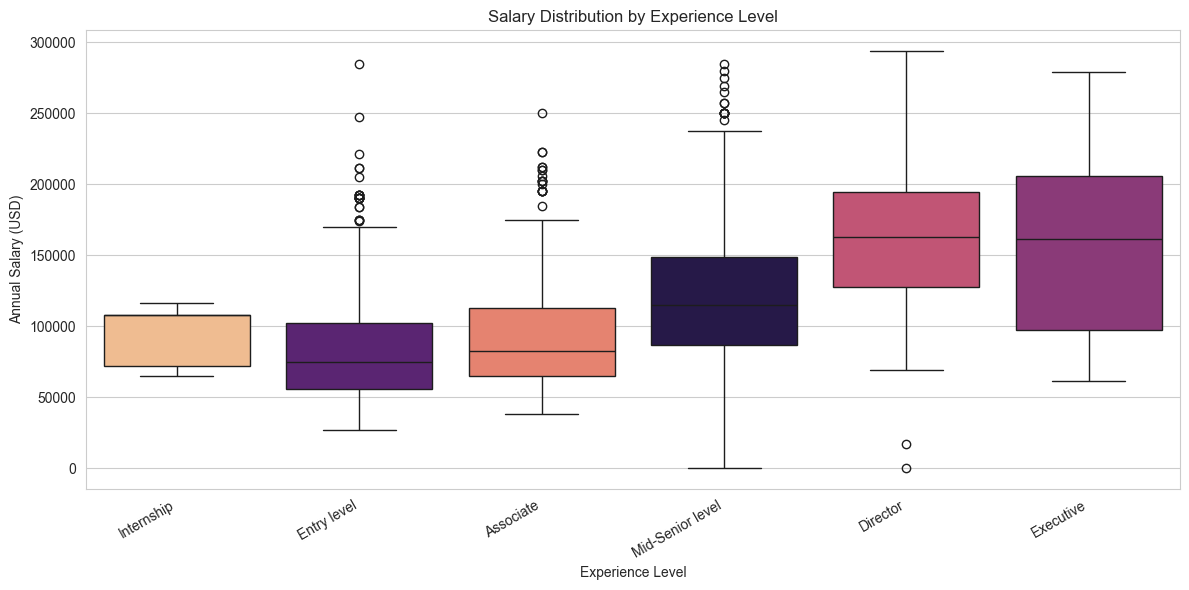

In [16]:
# Load the salary-verified subset
salary_df = pd.read_csv('cleaned_salary_data.csv') 
sns.set_style("whitegrid") 

# 1. Define the Order of Experience Levels (Crucial for Box Plot)
# We order the categories manually to show progression clearly.
experience_order = [
    'Internship', 
    'Entry level', 
    'Associate', 
    'Mid-Senior level', 
    'Director', 
    'Executive'
]

# Filter data to only include the defined, relevant experience levels
# This removes noise from missing or vague categories
salary_experience_subset = salary_df[salary_df['formatted_experience_level'].isin(experience_order)].copy()


# 2. Visualize Salary Distribution by Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=salary_experience_subset,
    x='formatted_experience_level',
    y='annual_salary',
    order=experience_order, # Use the defined order
    hue='formatted_experience_level', # Fix for FutureWarning
    palette='magma',
    legend=False
)

# Improve readability
plt.xticks(rotation=30, ha='right')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Annual Salary (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()